In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
movie = pd.read_table(r'C:\Users\125482\Desktop\Movie ratings project\movies.dat',sep = "::", names = ['MovieID','Movie','Genre'])
rating = pd.read_table(r'C:\Users\125482\Desktop\Movie ratings project\ratings.dat',sep = "::", names = ['UserID', 'MovieID', 'Rating', 'TimeStamp'])
user = pd.read_table(r'C:\Users\125482\Desktop\Movie ratings project\users.dat',sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])

C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can a

In [3]:
# CHECK DATA
user.head()
movie.head()
rating.head()

,UserID,MovieID,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# JOIN THE 3 DATASETS
rm = rating.join(movie.set_index('MovieID'), on='MovieID', how='left', lsuffix='l').drop('TimeStamp', axis=1)
rum = rm.join(user.set_index('UserID'), on='UserID', how='left')
rum.head()

,UserID,MovieID,Rating,Movie,Genre,Gender,Age,Occupation,ZipCode
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [5]:
rum.isna().sum()     # NO NULL VALUES FOUND

UserID        0
MovieID       0
Rating        0
Movie         0
Genre         0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64

In [6]:
print(user['UserID'].count())     #6040 UNIQUE USERS
print(movie['MovieID'].count())   #3883 UNIQUE MOVIES

6040
3883


In [7]:
# ADD "OCCUPATION TYPE" AND "ACTUAL AGE" COLUMNS (BY CREATING DICTIONARY)

dict = {'Occupation':[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'OccupationType':['Other or not specified', 'Academic/Educator', 'Artist', 'Clerical/Admin', 'College/grad student', 'Customer service', 'Doctor/Health care', 'Executive/Managerial', 'Farmer', 'Homemaker', 'K-12 Student', 'Lawyer', 'Programmer', 'Retired', 'Sales/Marketing', 'Scientist', 'Self-Employed', 'Technician/Engineer', 'Tradesman/Craftsman', 'Unemployed', 'Writer']}
occ = pd.DataFrame(dict)
rum1 = rum.join(occ.set_index('Occupation'), on = 'Occupation', how = 'left')

dict = {'Age':[1, 18, 25, 35, 45, 50, 56], 'AgeGroup':['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']}
age = pd.DataFrame(dict)
rum2 = rum1.join(age.set_index('Age'), on = 'Age', how = 'left')
rum2.head(2)

,UserID,MovieID,Rating,Movie,Genre,Gender,Age,Occupation,ZipCode,OccupationType,AgeGroup
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,K-12 Student,Under 18
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,K-12 Student,Under 18


In [8]:
a = rum2.groupby('Movie')['MovieID'].count().sort_values(ascending=False)

In [9]:
rum2.groupby('Gender')['Rating'].count()

Gender
F    246440
M    753769
Name: Rating, dtype: int64

In [10]:
rum2.groupby('Gender')['Rating'].mean()

Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


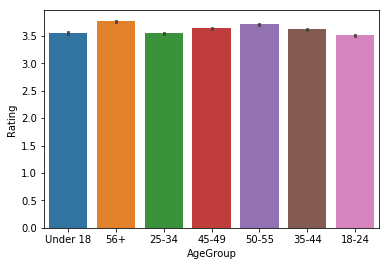

In [12]:
sns.barplot(x=rum2['AgeGroup'], y=rum2['Rating'])

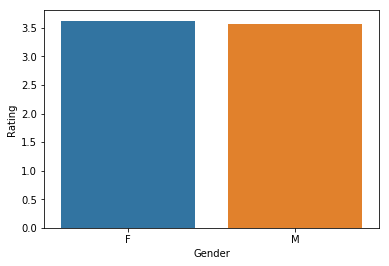

In [14]:
sns.barplot(x=rum2['Gender'], y=rum2['Rating'])

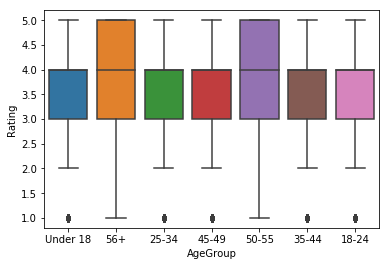

In [25]:
sns.boxplot(x=rum2['AgeGroup'], y=rum2['Rating'])

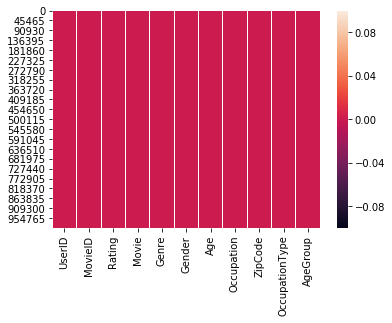

In [15]:
sns.heatmap(rum2.isna())     # NO NULL VALUES

In [15]:
# RECOMMENDING TOP 20 MOVIES TO NEW USERS (WHO HAVEN'T SELECTED ANY MOVIE YET)

Ratings = pd.DataFrame(rum2.groupby('Movie')['Rating'].mean())
Ratings['Count'] = pd.DataFrame(rum2.groupby('Movie')['Rating'].count())
Ratings.loc[Ratings['Count']>1000].sort_values(by='Rating', ascending=False).head(10)

,Rating,Count
Movie,,
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
"Usual Suspects, The (1995)",4.517106,1783
Schindler's List (1993),4.510417,2304
Raiders of the Lost Ark (1981),4.477725,2514
Rear Window (1954),4.476190,1050
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.449890,1367
Casablanca (1942),4.412822,1669


In [16]:
mat = rum2.pivot_table(index = 'UserID', columns = 'Movie', values = 'Rating')   #ARRANGING MOVIES IN COLUMNS

In [17]:
# FUNCTION TO RECOMMEND MAX 20 MOVIES TO THE USER WITH MAXIMUM CORRELATION TO THE MOVIE IN QUESTION

def recommend (m):
    rat = mat[m]                                                     # pull respective movie ratings
    rat_corr = mat.corrwith(rat)                                     # calculating correlation of that movie with all others
    rat_corr_df = pd.DataFrame(rat_corr, columns = ['Correlation'])  # convert the above matrix in a dataframe
    rat_corr_df.dropna(inplace=True)                                 # drop na from the result (movies rarely having rating)
    rat_corr_df = rat_corr_df.join(Ratings['Count'])                 # Join ratings count
    res = rat_corr_df[rat_corr_df['Count']>500]                      # filter out movies with less than 500 ratings
    res = res.sort_values(by = 'Correlation', ascending = False)     # sort result by correlation descending
    return res.head(20)

recommend("1-900 (1994)")

C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\125482\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Count
Movie,,
2001: A Space Odyssey (1968),1.0,1716
Gone with the Wind (1939),1.0,1156


In [18]:
# GETTING GENRE IN COLUMNS AND THEN MERGING AGEGROUP

gen = ["Animation", "Adventure", "Comedy", "Action", "Drama", "Thriller", "Crime", "Romance", "Children's", "Documentary", "Sci-Fi", "Horror", "Western", "Mystery", "Film-Noir", "War", "Fantasy", "Musical"]
mg = movie
for x in range(0, len(gen)):
    a = gen[x]
    mg[a] = ''
    for i in range(0,len(movie)):
        if re.search(a ,mg.iloc[i,2]):
            mg.iloc[i,3+x] = 1
        else:
            mg.iloc[i,3+x] = 0
            
a = rum2[['Movie', 'AgeGroup']]
b = pd.DataFrame(a.merge(mg, how='left', on='Movie'))
b.head(2)

,Movie,AgeGroup,MovieID,Genre,Animation,Adventure,Comedy,Action,Drama,Thriller,...,Children's,Documentary,Sci-Fi,Horror,Western,Mystery,Film-Noir,War,Fantasy,Musical
0,One Flew Over the Cuckoo's Nest (1975),Under 18,1193,Drama,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,James and the Giant Peach (1996),Under 18,661,Animation|Children's|Musical,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
l = pd.DataFrame(b.groupby('AgeGroup')['Animation'].sum()).pivot_table('Animation', columns='AgeGroup')
m = pd.DataFrame(b.groupby('AgeGroup')['Adventure'].sum()).pivot_table('Adventure', columns='AgeGroup')
n = pd.DataFrame(b.groupby('AgeGroup')['Comedy'].sum()).pivot_table('Comedy', columns='AgeGroup')
o = pd.DataFrame(b.groupby('AgeGroup')['Action'].sum()).pivot_table('Action', columns='AgeGroup')
p = pd.DataFrame(b.groupby('AgeGroup')['Drama'].sum()).pivot_table('Drama', columns='AgeGroup')
q = pd.DataFrame(b.groupby('AgeGroup')['Thriller'].sum()).pivot_table('Thriller', columns='AgeGroup')
r = pd.DataFrame(b.groupby('AgeGroup')['Crime'].sum()).pivot_table('Crime', columns='AgeGroup')
s = pd.DataFrame(b.groupby('AgeGroup')['Romance'].sum()).pivot_table('Romance', columns='AgeGroup')
t = pd.DataFrame(b.groupby('AgeGroup')["Children's"].sum()).pivot_table("Children's", columns='AgeGroup')
u = pd.DataFrame(b.groupby('AgeGroup')['Documentary'].sum()).pivot_table('Documentary', columns='AgeGroup')
v = pd.DataFrame(b.groupby('AgeGroup')['Sci-Fi'].sum()).pivot_table('Sci-Fi', columns='AgeGroup')
w = pd.DataFrame(b.groupby('AgeGroup')['Horror'].sum()).pivot_table('Horror', columns='AgeGroup')
x = pd.DataFrame(b.groupby('AgeGroup')['Western'].sum()).pivot_table('Western', columns='AgeGroup')
y = pd.DataFrame(b.groupby('AgeGroup')['Mystery'].sum()).pivot_table('Mystery', columns='AgeGroup')
z = pd.DataFrame(b.groupby('AgeGroup')['Film-Noir'].sum()).pivot_table('Film-Noir', columns='AgeGroup')
za = pd.DataFrame(b.groupby('AgeGroup')['War'].sum()).pivot_table('War', columns='AgeGroup')
zb = pd.DataFrame(b.groupby('AgeGroup')['Fantasy'].sum()).pivot_table('Fantasy', columns='AgeGroup')
zc = pd.DataFrame(b.groupby('AgeGroup')['Musical'].sum()).pivot_table('Musical', columns='AgeGroup')

matrixcnt = l.append(m).append(n).append(o).append(p).append(q).append(r).append(s).append(t).append(u).append(v).append(w).append(x).append(y).append(z).append(za).append(zb).append(zc)

matrixcnt

AgeGroup,18-24,25-34,35-44,45-49,50-55,56+,Under 18
Animation,10269,16454,8117,2889,2032,1083,2449
Adventure,26324,52633,26682,10738,9090,4488,3998
Comedy,69980,143210,69244,27890,23133,11961,11162
Action,50186,105678,50503,19357,17012,8143,6578
Drama,58104,138695,71590,32141,29247,17269,7483
Thriller,35877,77429,36840,14933,13240,6537,4824
Crime,15373,33030,14895,6048,5520,2974,1701
Romance,25656,58003,29330,13283,11373,6279,3599
Children's,16924,25743,14004,5400,3890,1888,4337
Documentary,1081,3489,1708,687,555,260,130


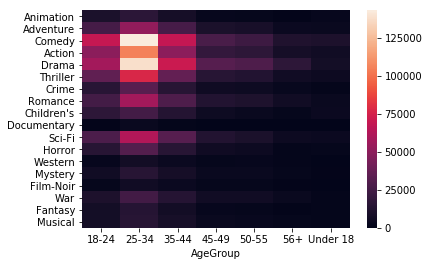

In [20]:
sns.heatmap(matrixcnt)